In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from matplotlib import cm, _cm
import math as mth
from mpl_toolkits.mplot3d import Axes3D
import pylab as plb
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg
#plt.rcParams['figure.figsize'] = [6, 6]
#plt.rcParams.update({'font.size': 18})

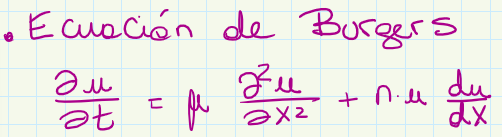

In [ ]:
!pip install plotly
!pip install viz_tools
!pip install plotly numpy scipy


ERROR: Could not find a version that satisfies the requirement viz_tools (from versions: none)
ERROR: No matching distribution found for viz_tools


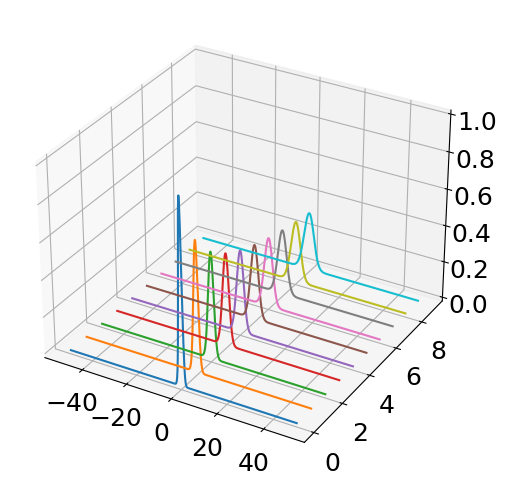

In [ ]:
a = 0.5   # Themal difusivity
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0 = np.exp(-x**2)
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * kappa**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:])

"    \n#Para hacer el gráfico interactivo\nu_plot = u[0:-1:10, :]\ndata = []\n\nfor j in range(u_plot.shape[0]):\n    ys = j * np.ones(u_plot.shape[1])\n    trace = go.Scatter3d(x=x, y=ys, z=u_plot[j, :], mode='lines')\n    data.append(trace)\n\nlayout = go.Layout(\n    title='Interactive Waterfall Plot',\n    scene=dict(\n        xaxis=dict(title='X'),\n        yaxis=dict(title='Time Step'),\n        zaxis=dict(title='U')\n    )\n)\n\nfig = go.Figure(data=data, layout=layout)\npio.show(fig)\n"

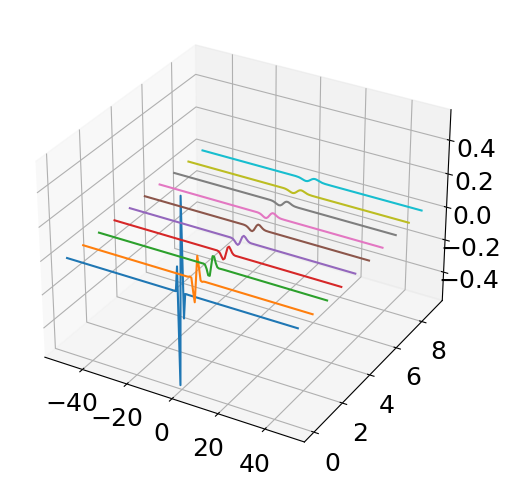

In [ ]:
a = 0.5    # Thermal diffusivity
L = 100  # Length of domain
N = 150 # Number of discretization points
dx = L / N
x = np.arange(-L/2, L/2, dx)  # Define x domain

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0 = np.sin(np.pi * x) * np.exp(-x**2)
u0hat = np.fft.fft(u0)

# Recast the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0, 10, dt)

def rhsHeat(uhat_ri, t, kappa, a):
    uhat = uhat_ri[:N] + 1j * uhat_ri[N:]
    d_uhat = -a**2 * kappa**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa, a))
uhat = uhat_ri[:, :N] + 1j * uhat_ri[:, N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k, :] = np.fft.ifft(uhat[k, :])

u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:])
'''
#Para hacer el gráfico interactivo
u_plot = u[0:-1:10, :]
data = []

for j in range(u_plot.shape[0]):
    ys = j * np.ones(u_plot.shape[1])
    trace = go.Scatter3d(x=x, y=ys, z=u_plot[j, :], mode='lines')
    data.append(trace)

layout = go.Layout(
    title='Interactive Waterfall Plot',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Time Step'),
        zaxis=dict(title='U')
    )
)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)
'''

In [ ]:
# Definición del sistema de EDOs (Ecuación en derivadas parciales -> FFT -> Sistema de EDOs)
def burg_system(u, t, k, mu, nu):
    # Derivada espacial en el dominio de Fourier
    u_hat = np.fft.fft(u)
    u_hat_x = 1j * k * u_hat
    u_hat_xx = -k**2 * u_hat

    # Cambio al dominio espacial
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    # Resolución de la EDO
    u_t = -mu * u * u_x + nu * u_xx
    return u_t.real

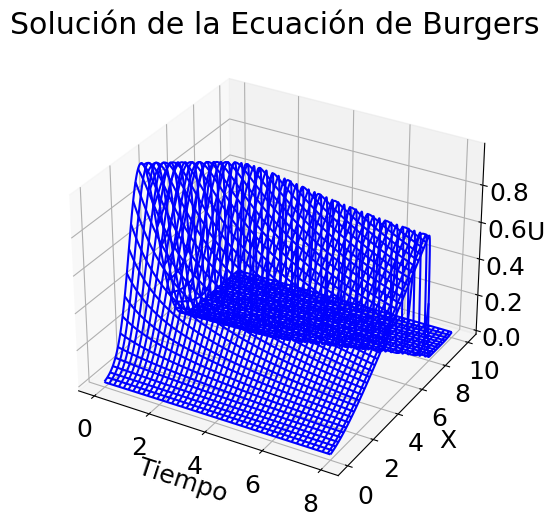

In [ ]:
# Parámetros para exponencial
mu = 1
nu = 0.01  # Coeficiente de viscosidad cinemática

# Malla espacial
L_x = 10  # Rango del dominio según x [m]
dx = 0.01  # Distancia infinitesimal
N_x = int(L_x / dx)  # Número de puntos de la malla espacial
X = np.linspace(0, L_x, N_x)  # Arreglo espacial

# Malla temporal
L_t = 8  # Duración de la simulación [s]
dt = 0.025  # Tiempo infinitesimal
N_t = int(L_t / dt)  # Número de puntos de la malla temporal
T = np.linspace(0, L_t, N_t)  # Arreglo temporal

# Discretización del número de onda
k = 2 * np.pi * np.fft.fftfreq(N_x, d=dx)

# Definición de la condición inicial
u0 = np.exp(-(X - 3)**2 / 2)  # Función de variable espacial que representa la forma de la onda en t=0

# Resolución de la EDP (resolución del sistema de EDOs)
U = odeint(burg_system, u0, T, args=(k, mu, nu), mxstep=5000).T

# Preparar datos para la gráfica 3D
To, Xo = np.meshgrid(T, X)
Z = U

# Crear una gráfica 3D interactiva usando matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(To, Xo, Z, color='blue')
ax.set_title('Solución de la Ecuación de Burgers')
ax.set_xlabel('Tiempo')
ax.set_ylabel('X')
ax.set_zlabel('U')

plt.show()

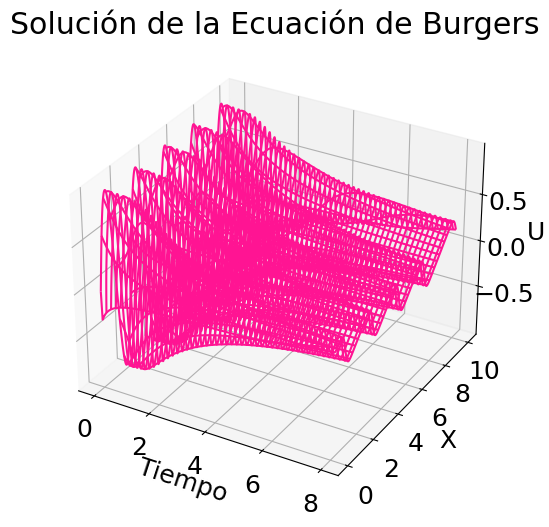

In [ ]:
# Parámetros para sinoidales
mu = 0.5
nu = 0.01  # Coeficiente de viscosidad cinemática

# Malla espacial
L_x = 10  # Rango del dominio según x [m]
dx = 0.01  # Distancia infinitesimal
N_x = int(L_x / dx)  # Número de puntos de la malla espacial
X = np.linspace(0, L_x, N_x)  # Arreglo espacial

# Malla temporal
L_t = 8  # Duración de la simulación [s]
dt = 0.025  # Tiempo infinitesimal
N_t = int(L_t / dt)  # Número de puntos de la malla temporal
T = np.linspace(0, L_t, N_t)  # Arreglo temporal

# Discretización del número de onda
k = 2 * np.pi * np.fft.fftfreq(N_x, d=dx)

# Definición de la condición inicial
u0 = np.sin(3*X)  # Función de variable espacial que representa la forma de la onda en t=0

# Resolución de la EDP (resolución del sistema de EDOs)
U = odeint(burg_system, u0, T, args=(k, mu, nu), mxstep=5000).T

# Preparar datos para la gráfica 3D
To, Xo = np.meshgrid(T, X)
Z = U

# Crear una gráfica 3D interactiva usando matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(To, Xo, Z, color='deeppink')
ax.set_title('Solución de la Ecuación de Burgers')
ax.set_xlabel('Tiempo')
ax.set_ylabel('X')
ax.set_zlabel('U')
plt.show()

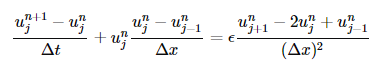

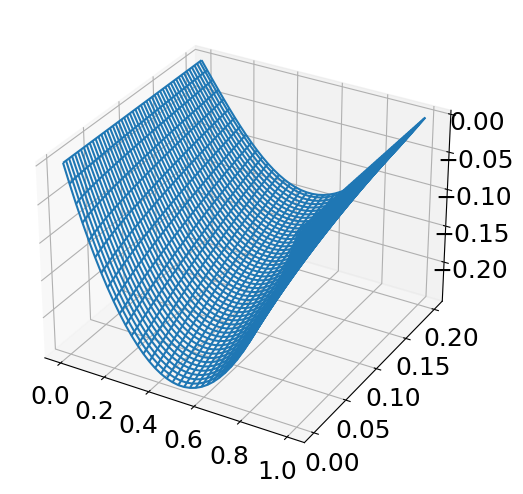

In [ ]:
# First start with diffusion equation with initial condition  u(x, 0) = 4x - 4x^2 and u(0, t) = u(L, t) = 0
# First discretise the domain [0, L] X [0, T]
# Then discretise the derivatives
# Generate algorithm:
# 1. Compute initial condition for all i
# 2. For all n:
#    2i. Compute u_i^{n + 1} for internal space points
#   2ii. Set boundary values for i = 0 and i = N_x

M = 40 # number of grid points for space interval
N = 200 # ''     '' ''   ''     ''  time ''

x0 = 0
xL = 1 # unit grid differences
dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2 # time step
dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)

# Initial matrix solution
U = np.zeros((M, N))

# Le impongo condiciones iniciales en la columna 0 del tiempo
U[:, 0] = xspan*(xspan-1)
# Boundary conditions
U[0, :] = 0 #En la primera fila de la posición es 0
U[-1, :] = 0 #En la última fila de la posición es 0

# Método de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]

# Plot the solution
Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()

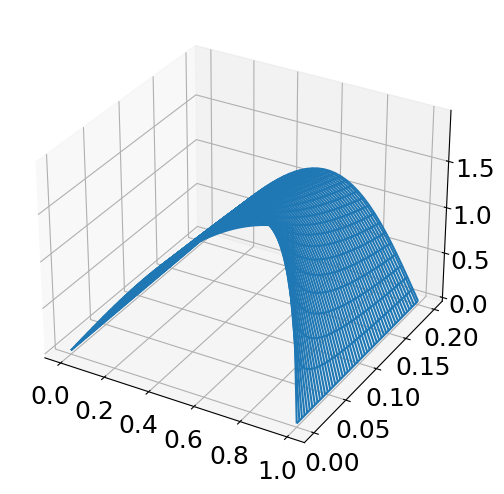

In [ ]:
M = 40 # number of grid points for space interval
N = 200 # ''     '' ''   ''     ''  time ''

x0 = 0
xL = 1 # unit grid differences
dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2 # time step
dt = (tF - t0) / (N - 1)

D = 0.2 # thermal diffusivity
a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)

# Initial matrix solution
U = np.zeros((M, N))

# Le impongo condiciones iniciales en la columna 0 del tiempo
U[:, 0] = 2 * np.sin((0.5) * np.pi * xspan)
# Boundary conditions
U[0, :] = 0 #En la primera fila de la posición es 0
U[-1, :] = 0 #En la última fila de la posición es 0

# Método de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]

# Plot the solution
Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()